In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
!pip install category_encoders==2.6.3
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
depression_data = pd.read_csv('Student Depression Dataset.csv')
depression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
null_v = depression_data.isnull().sum()
print(null_v)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
depression_data['Financial Stress'] = imputer.fit_transform(depression_data[['Financial Stress']])

In [ ]:
unique_profess = depression_data['Profession'].unique()
unique_degree = depression_data['Degree'].unique()
unique_city = depression_data['City'].unique()
print(unique_city)
print(unique_profess)
print(unique_degree)

['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


In [ ]:
#Encoding Categorical data of many values
encoder = LabelEncoder()
depression_data['Profession_encoded'] = encoder.fit_transform(depression_data['Profession'])
depression_data['Degree_encoded'] = encoder.fit_transform(depression_data['Degree'])
depression_data['City_encoded'] = encoder.fit_transform(depression_data['City'])
depression_data['Dietary Habits'] = encoder.fit_transform(depression_data['Dietary Habits'])
depression_data['Sleep Duration'] = encoder.fit_transform(depression_data['Sleep Duration'])
depression_data = depression_data.drop('id', axis = 1)
depression_data = depression_data.drop('Profession', axis = 1)
depression_data = depression_data.drop('Degree', axis=1)
depression_data = depression_data.drop('City', axis=1)
depression_data.head()

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Profession_encoded,Degree_encoded,City_encoded
0,Male,33.0,5.0,0.0,8.97,2.0,0.0,0,0,Yes,3.0,1.0,No,1,11,3,51
1,Female,24.0,2.0,0.0,5.90,5.0,0.0,0,1,No,3.0,2.0,Yes,0,11,10,3
2,Male,31.0,3.0,0.0,7.03,5.0,0.0,2,0,No,9.0,1.0,Yes,0,11,5,44
3,Female,28.0,3.0,0.0,5.59,2.0,0.0,1,1,Yes,4.0,5.0,Yes,1,11,7,49
4,Female,25.0,4.0,0.0,8.13,3.0,0.0,0,1,Yes,1.0,1.0,No,0,11,17,16


In [ ]:
depression_data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Depression,Profession_encoded,Degree_encoded,City_encoded
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,1.511415,1.465754,7.156984,3.140067,0.585499,10.993764,10.915738,26.294291
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,1.063126,1.239704,3.707642,1.437399,0.492645,0.243990,7.235785,16.356033
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,1.000000,0.000000,4.000000,2.000000,0.000000,11.000000,5.000000,14.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,2.000000,1.000000,8.000000,3.000000,1.000000,11.000000,11.000000,24.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,2.000000,3.000000,10.000000,4.000000,1.000000,11.000000,16.000000,44.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,4.000000,3.000000,12.000000,5.000000,1.000000,13.000000,27.000000,51.000000


In [ ]:
#One-hot encoding categorical features
depression_data = pd.get_dummies(depression_data, columns=['Gender'], drop_first=True)
depression_data = pd.get_dummies(depression_data, columns=['Family History of Mental Illness'], drop_first=True)
depression_data = pd.get_dummies(depression_data, columns=['Depression'], drop_first=True)
depression_data = pd.get_dummies(depression_data, columns=['Have you ever had suicidal thoughts ?'], drop_first=True)

depression_data.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Profession_encoded,Degree_encoded,City_encoded,Gender_Male,Family History of Mental Illness_Yes,Depression_1,Have you ever had suicidal thoughts ?_Yes
0,33.0,5.0,0.0,8.97,2.0,0.0,0,0,3.0,1.0,11,3,51,True,False,True,True
1,24.0,2.0,0.0,5.90,5.0,0.0,0,1,3.0,2.0,11,10,3,False,True,False,False
2,31.0,3.0,0.0,7.03,5.0,0.0,2,0,9.0,1.0,11,5,44,True,True,False,False
3,28.0,3.0,0.0,5.59,2.0,0.0,1,1,4.0,5.0,11,7,49,False,True,True,True
4,25.0,4.0,0.0,8.13,3.0,0.0,0,1,1.0,1.0,11,17,16,False,False,False,True


In [ ]:
X = depression_data.drop(['Depression_1', 'City_encoded', 'Profession_encoded', 'Degree_encoded','Gender_Male', 'Study Satisfaction'], axis=1)
y = depression_data['Depression_1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
#Scalling numerical features
standard_scaler = StandardScaler()
numerical_features = ['Age','CGPA', 'Sleep Duration', 'Work/Study Hours']
X_train[numerical_features] = standard_scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = standard_scaler.transform(X_test[numerical_features])


# K-Nearest Neighbour

In [ ]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(1, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
{'n_neighbors': 22}


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=22)
cv_scores = cross_val_score(KNN_model, X_train, y_train, cv=10, scoring='accuracy')
print("KNN Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

KNN Cross-Validation Scores: [0.83930705 0.83930705 0.83512545 0.82676225 0.81600956 0.83333333
 0.82915173 0.84169654 0.84229391 0.83213859]
Mean Accuracy: 0.8335125448028673


In [ ]:
knn = KNN_model.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)

Accuracy Score: 0.8280620016127587
Precision Score: 0.8328020863517821
Recall Score: 0.8825426070935053


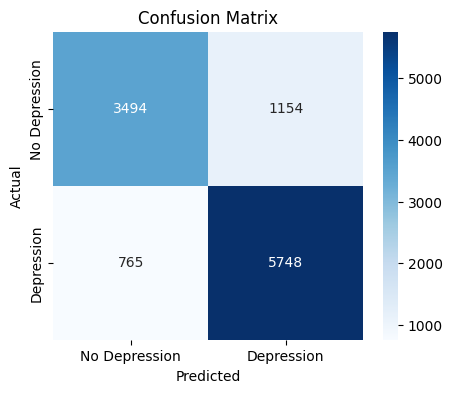

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Support Vector Machine

In [ ]:
# Initialize SVM model
svm_model = SVC(kernel='linear', probability=True)
# Perform cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=7, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.85200669 0.85117057 0.83444816 0.83897951 0.84650774 0.84441656
 0.84399833]
Mean Accuracy: 0.8445039358655638


In [ ]:
# Hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly']}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'kernel': 'linear'}


In [ ]:
# Train best model
best_svm = SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], probability=True)
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8408744736134754
              precision    recall  f1-score   support

       False       0.83      0.78      0.80      4648
        True       0.85      0.88      0.87      6513

    accuracy                           0.84     11161
   macro avg       0.84      0.83      0.84     11161
weighted avg       0.84      0.84      0.84     11161



In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)

Accuracy Score: 0.8408744736134754
Precision Score: 0.8508369130499185
Recall Score: 0.8819284507907262


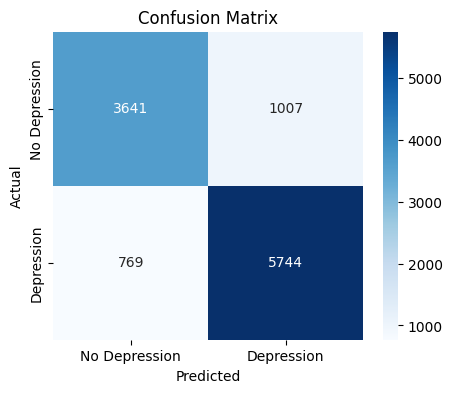

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Logistic Regression

In [ ]:
# Initializing Logistic Regression Model
LR_model = LogisticRegression(class_weight="balanced")

# Training the model
LR_model.fit(X_train, y_train)

# Making predictions
y_pred_LR = LR_model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_LR)
precision = precision_score(y_test, y_pred_LR)
recall = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8354986112355524
Precision: 0.874339683047863
Recall: 0.8386304314448026
F1 Score: 0.8561128526645768


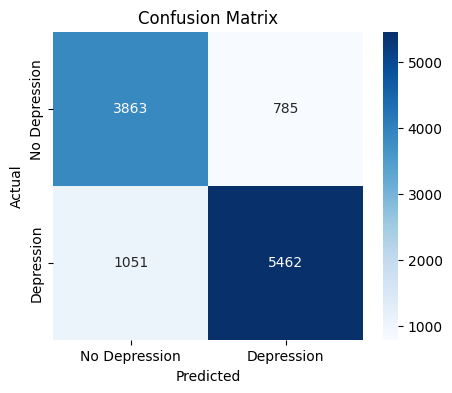

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### **Model Performance Metrics**  

#### **K-Nearest Neighbour**  
| Precision | Recall  | Accuracy | F1-score |
|-----------|--------|----------|----------|
| 83.28%    | 88.25% | 82.81%   | 85.69%   |  

#### **Logistic Regression**  
| Precision | Recall  | Accuracy | F1-score |
|-----------|--------|----------|----------|
| 87.43%    | 83.86% | 83.55%   | 85.61%   |  

#### **Support Vector Machine**  
| Precision | Recall  | Accuracy | F1-score |
|-----------|--------|----------|----------|
| 85.03%    | 88.19% | 84.08%   | 86.61%   |  

### **Best Model Selection**  
| Model                  | Best Metric(s)       |
|------------------------|----------------------|
| **Support Vector Machine (SVM)** | Highest Accuracy & F1-score |
| **K-Nearest Neighbour (KNN)** | Highest Recall |
| **Logistic Regression** | Highest Precision |
